In [1]:
from hydra import initialize, compose
import json
from rdkit import Chem
from rdkit.Chem import AllChem
from pathlib import Path
from ergochem.draw import draw_reaction, draw_molecule
from IPython.display import SVG
import pandas as pd
import ast

In [2]:
with initialize(version_base=None, config_path="./conf/filepaths"):
    filepaths = compose(config_name="filepaths")

In [3]:
entries = {}
for i in range(0, 11):
    with open(Path(filepaths.raw_mcsa) / f"entries_{i}.json", "r") as f:
        entries = {**entries, **json.load(f)}

In [4]:
mech_df = pd.read_csv(Path(filepaths.processed_data) / 'mcsa' / 'mech_labeled_reactions.csv', sep=",")
mech_df['mech_atoms'] = mech_df['mech_atoms'].apply(lambda x: ast.literal_eval(x))
mech_df.head()

,entry_id,mechanism_id,smarts,mech_atoms
0,1,1,[O:28]=[C:29]([O-:30])[CH:31]([NH3+:32])[CH2:3...,"[[28, 29, 30, 31]]"
1,2,2,[OH2:60].[CH:23]1([NH:36][C:38]([*:39])=[O:40]...,"[[60], [24, 25, 27]]"
2,2,1,[OH2:61].[CH:39]1([NH:52][C:54]([*:55])=[O:56]...,"[[61], [40, 41, 43]]"
3,3,1,>>NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-...,[]
4,4,2,[Cu+2:75].[O:57]=[N:58][OH:59]>>O.[N]=O.[Cu+],"[[], [57, 58, 59]]"


In [13]:
len(mech_df)

727

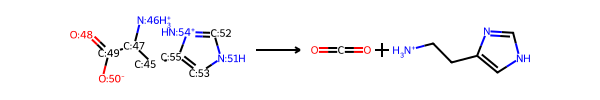

Mechanism: #1


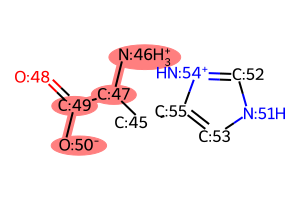

In [5]:
def display_mech_labeled_rxn(entry_id: int):
    sma2mol = lambda x : Chem.MolFromSmiles(Chem.MolToSmiles(Chem.MolFromSmarts(x)))

    # Get the reaction
    smarts = mech_df.loc[mech_df['entry_id'] == entry_id, 'smarts'].iloc[0]
    lhs = [sma2mol(elt) for elt in smarts.split('>>')[0].split('.')]
    display(SVG(draw_reaction(smarts, sub_img_size=(150, 100))))

    these_mechs = mech_df.loc[mech_df['entry_id'] == entry_id]
    for _, row in these_mechs.iterrows():
        print(f"Mechanism: #{row['mechanism_id']}")
        mech_atom_map_nums = row['mech_atoms']

        # Get atoms involved in the reaction
        involved_atoms = []
        for ams, mol in zip(mech_atom_map_nums, lhs):
            involved_atoms.append([atom.GetIdx() for atom in mol.GetAtoms() if atom.GetAtomMapNum() in ams])
        
        # Display
        for i, rct in enumerate(lhs):
            display(SVG(draw_molecule(rct, size=(300, 200), highlight_atoms=involved_atoms[i], draw_options={"addAtomIndices": False})))


display_mech_labeled_rxn(49)

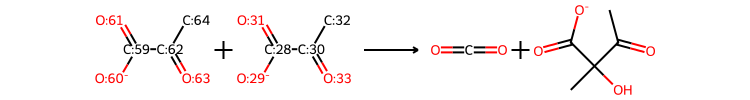

Mechanism: #1


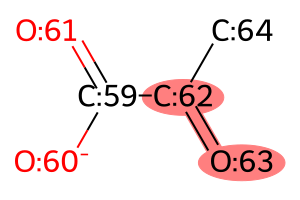

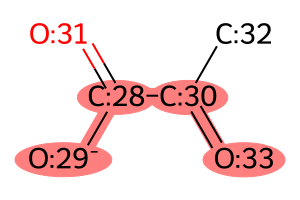

In [6]:
display_mech_labeled_rxn(722)

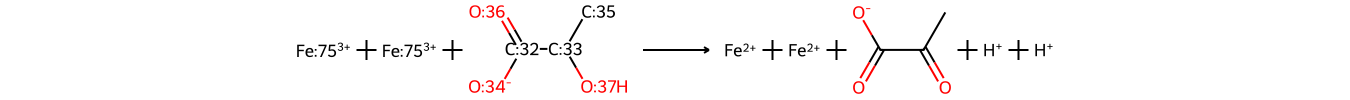

Mechanism: #1


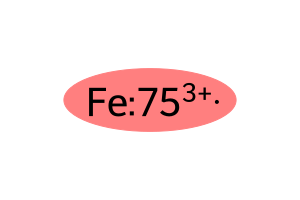

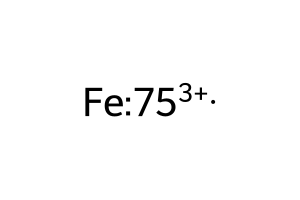

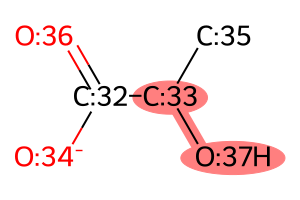

Mechanism: #2


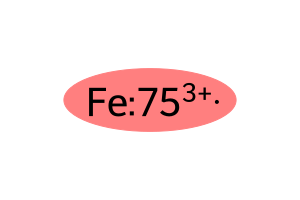

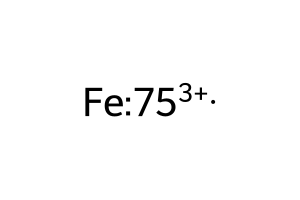

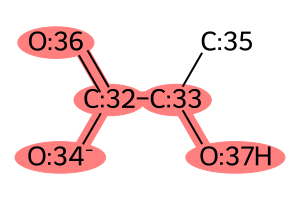

In [7]:
display_mech_labeled_rxn(102)

Whittled down dative cycle issue

In [8]:
rule = '[Mg+2:1]1<-[#8-:21]-[#6H2:23]-[#6:25]-[#8-:26]->1>>[Mg+2:1]1<-[#8-:21]-[#6-:23]-[#6:25]-[#8-:26]->1'
rct_sma = '[Mg+2:1]1<-[#8-:21]-[#6H2:23]-[#6:25]-[#8-:26]->1'
rct = Chem.MolFromSmarts(rct_sma)
Chem.SanitizeMol(rct)
rxn = AllChem.ReactionFromSmarts(rule, useSmiles=False)
rxn.RunReactants([rct])

()

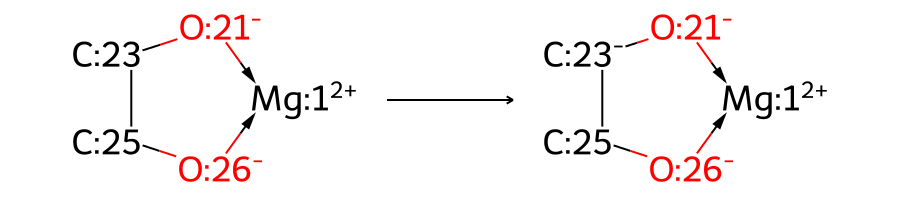

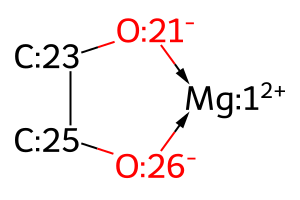

In [9]:
display(SVG(draw_reaction(rule)))
display(SVG(draw_molecule(rct, size=(300, 200))))

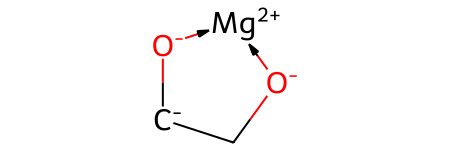

In [10]:
rule = '[#8-:26]1->[Mg+2:1]<-[#8-:21]-[#6H2:23]-[#6:25]-1>>[#8-:26]1->[Mg+2:1]<-[#8-:21]-[#6-:23]-[#6:25]-1'
rct_sma = '[#8-:26]1->[Mg+2:1]<-[#8-:21]-[#6H2:23]-[#6:25]-1'
rct = Chem.MolFromSmarts(rct_sma)
Chem.SanitizeMol(rct)
rxn = AllChem.ReactionFromSmarts(rule, useSmiles=False)
rxn.RunReactants([rct])[0][0]

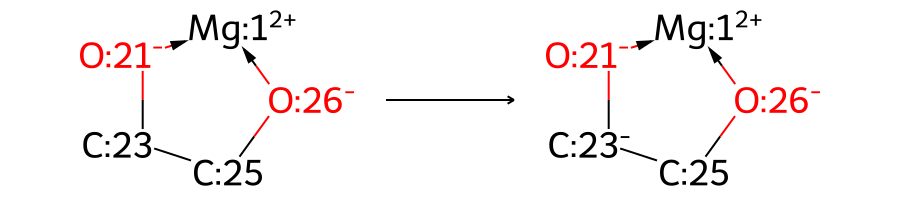

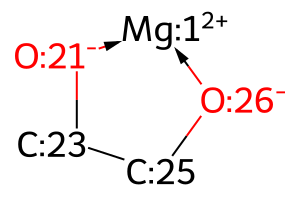

In [11]:
display(SVG(draw_reaction(rule)))
display(SVG(draw_molecule(rct, size=(300, 200))))

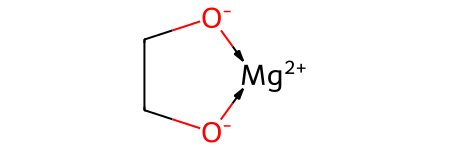

In [12]:
rule = '[Mg+2:1]1<-[#8-:21]-[#6H2:23]-[#6:25]-[#8-:26]->1>>[Mg+2:1]1<-[#8-:21]-[#6-:23]-[#6:25]-[#8-:26]->1'
rct_sma = '[Mg+2:1]1<-[#8-:21]-[#6H2:23]-[#6:25]-[#8-:26]->1'
rct = Chem.MolFromSmarts(rct_sma)
Chem.SanitizeMol(rct)
rxn = AllChem.ReactionFromSmarts(rule, useSmiles=True)
rxn.RunReactants([rct])[0][0]